In [638]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import community
import random

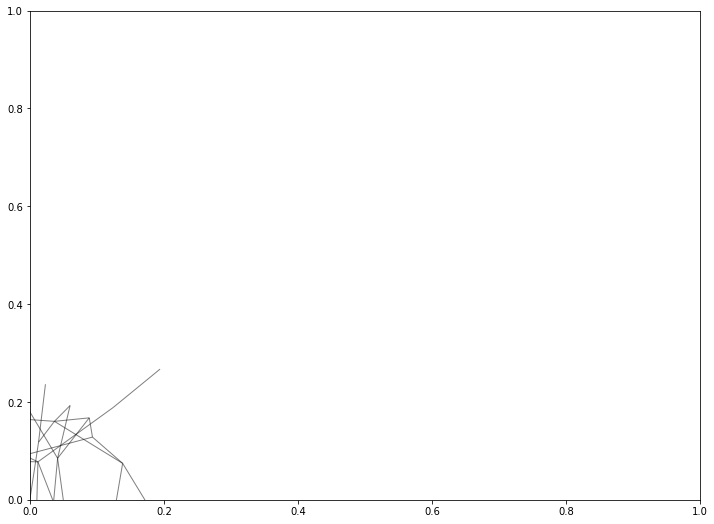

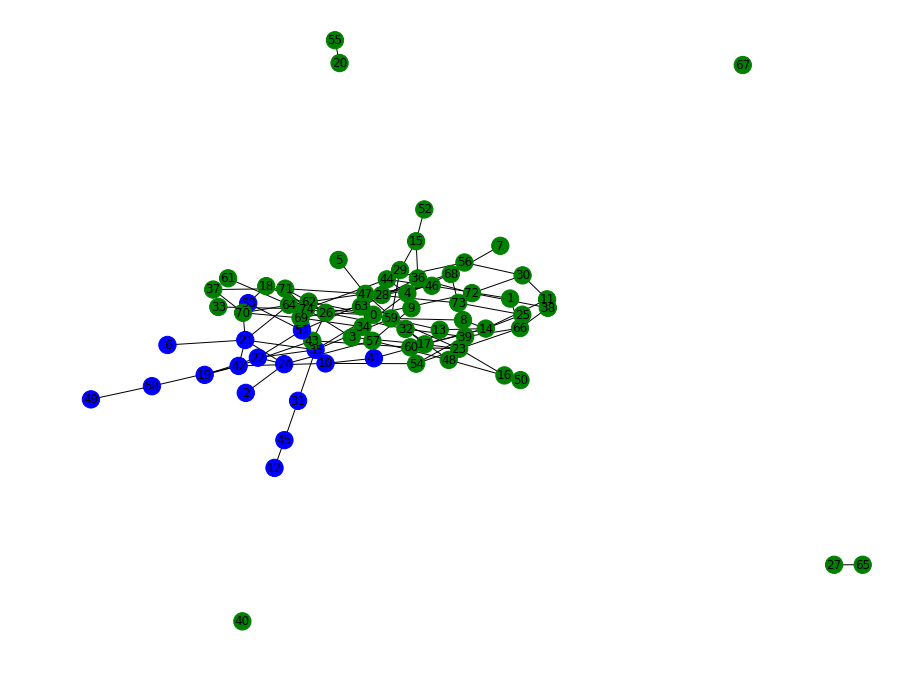

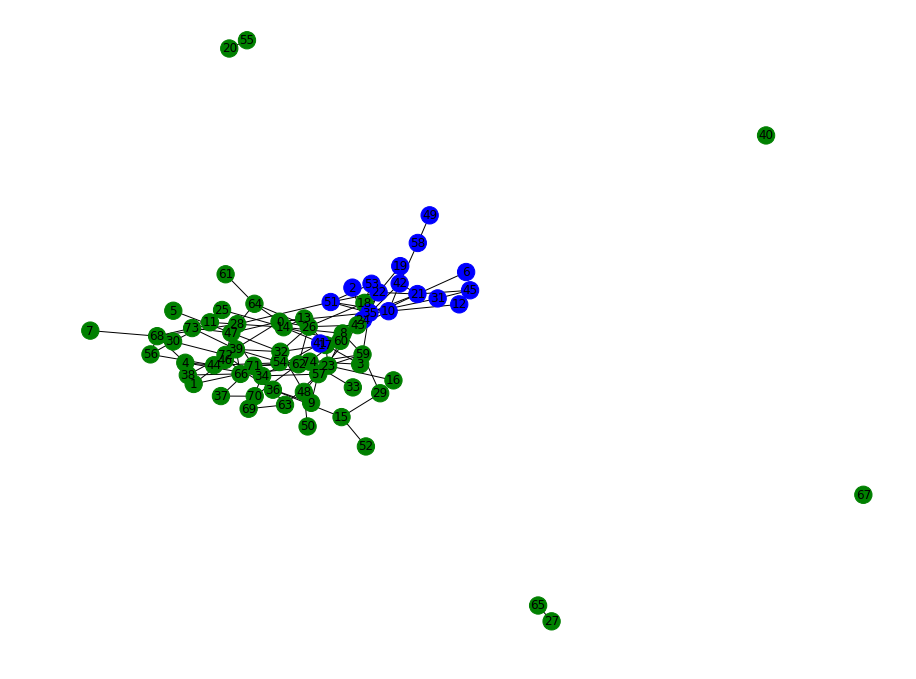

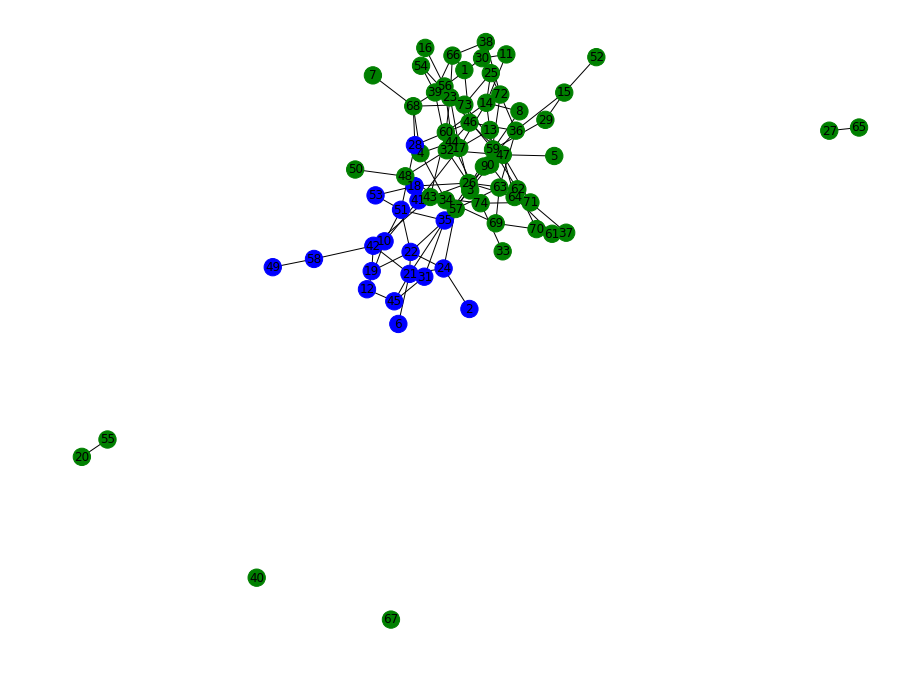

In [641]:
res =[]

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
for i in range(1):
    G = nx.erdos_renyi_graph(75, 0.04)
    #first compute the best partition
    partition = community.best_partition(G)

    #drawing
    size = float(len(set(partition.values())))
    pos = nx.spring_layout(G)
    count = 0.
    max_size = 0 
    for comm in set(partition.values()) :
        count = count + 1.
        list_nodes = [nodes for nodes in partition.keys()
                                    if partition[nodes] == comm]
        if(len(list_nodes) > max_size):
            echo_chamber = list_nodes
            max_size = len(list_nodes)
        '''
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                    node_color = str(count / size))
        '''
    
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    
    color_map = []
    for node in G:
        if node in echo_chamber:
            color_map.append('blue')
        else: color_map.append('green')      
    nx.draw(G,node_color = color_map,with_labels = True)
    plt.show()
    

    status = 'healthy'
    threshold = 0.27
    nx.set_node_attributes(G, status, 'status')
    nx.set_node_attributes(G, threshold, 'threshold')
    G.nodes[0]['status']


    external_links = 0
    for node in echo_chamber:
        for neighbor in G.neighbors(node):
            if neighbor not in echo_chamber:
                external_links = external_links + 1 


    nw_polarization = 0.2
    opinion_polarization = 0.6

    modified_edge_count = 0 
    for node in echo_chamber:
        #G.nodes[node]['threshold'] = opinion_polarization - G.nodes[node]['threshold']
        for neighbor in G.neighbors(node):
            if modified_edge_count >= (nw_polarization * external_links):
                break;
            if(neighbor not in echo_chamber):
                G.remove_edge(node, neighbor)
                new_neighbor = random.choice(echo_chamber);
                while(G.has_edge(node, new_neighbor) or node==new_neighbor):
                    new_neighbor = random.choice(echo_chamber)
                G.add_edge(node, new_neighbor)
                modified_edge_count = modified_edge_count + 1

    color_map = []
    for node in G:
        if node in echo_chamber:
            color_map.append('blue')
        else: 
            color_map.append('green')      
    nx.draw(G, node_color = color_map,with_labels = True)
    plt.show()  
    

    activator_node = random.choice(echo_chamber)
    G.nodes[activator_node]['status'] = "activated"
    for neighbor in G.neighbors(activator_node):
        G.nodes[neighbor]['status'] = "activated"

    while True:
        prev_status = nx.get_node_attributes(G, 'status')
        for node in list(G.nodes):
            act_count = 0
            if G.nodes[node]['status'] != "activated":
                status = nx.get_node_attributes(G, 'status')
                neighbor_count = len(list(G.neighbors(node)))
                for neighbor in G.neighbors(node):
                    if status[neighbor] == "activated":
                        act_count = act_count + 1
                if act_count > (neighbor_count *  G.nodes[node]['threshold'] ) and act_count!=0:
                    G.nodes[node]['status'] = "activated"
        curr_status = nx.get_node_attributes(G, 'status')
        matches = len([i for i, j in zip(prev_status.values(), curr_status.values()) if i == j]) 
        if matches == G.number_of_nodes():
            break
    
    color_map = []
    for node in G:
        if G.nodes[node]['status'] == 'activated':
            color_map.append('blue')
        else: color_map.append('green')      
    nx.draw(G,node_color = color_map,with_labels = True)
    plt.show()
    

    status = nx.get_node_attributes(G, 'status')
    res.append(round(sum( x == 'activated' for x in status.values() )/ G.number_of_nodes(), 4))



In [637]:
sum(i > 0.5 for i in res)

62

In [13]:
# Detecting echo chambers in the social network
partition = community.community_louvain.best_partition(er_graph)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(er_graph)

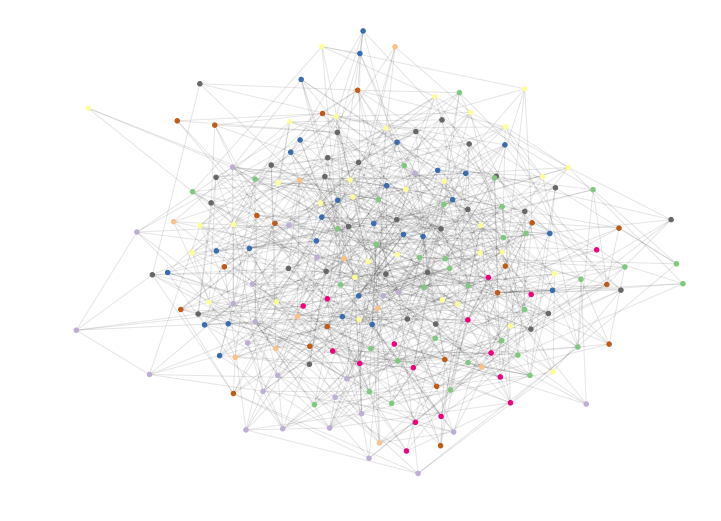

In [15]:
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

# Draw community graph
plt.axis('off')
nx.draw_networkx_nodes(er_graph, pos, node_size=20, cmap=plt.cm.Accent, node_color=list(partition.values()))
nx.draw_networkx_edges(er_graph, pos, alpha=0.1)


In [16]:
def read_graph(filename):
    G = nx.Graph()
    lines = [line.rstrip('\n') for line in open(filename, 'r')] 
    edge_list=list(map(lambda edge: [int(edge.split()[0]), int(edge.split()[1])], lines))
    G.add_edges_from(edge_list)
    return G

In [17]:
fb_graph=read_graph("../data/facebook_combined.txt")

In [18]:
print(nx.info(fb_graph))
print("Clustering Coefficient:", round(nx.average_clustering(fb_graph),4))


Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910
Clustering Coefficient: 0.6055


In [19]:
spring_pos = nx.spring_layout(fb_graph)

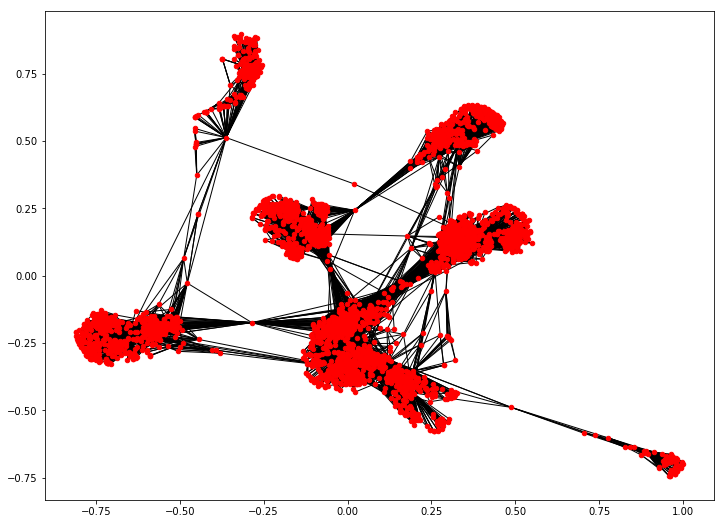

In [20]:

nx.draw_networkx(fb_graph, pos = spring_pos, with_labels=False, node_size=20)

In [21]:
#parts = community_louvain.best_partition(fb_graph)
#values = [parts.get(node) for node in fb_graph.nodes()]

NameError: name 'community_louvain' is not defined

In [22]:
# Detecting echo chambers in the social network
partition = community.community_louvain.best_partition(fb_graph)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(fb_graph)

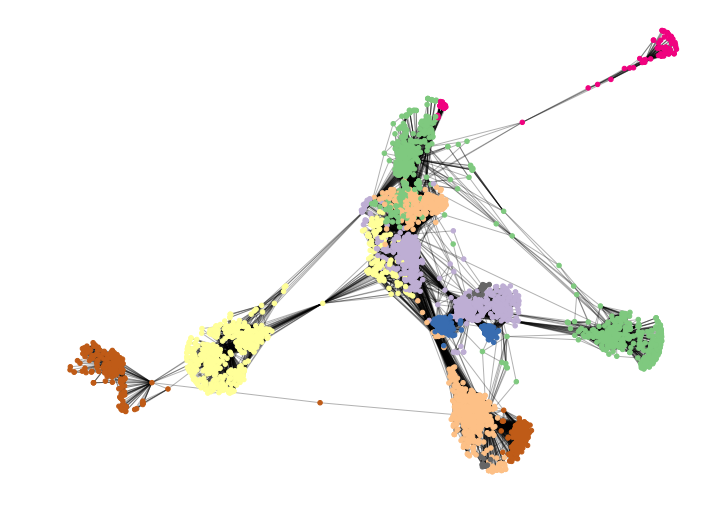

In [23]:
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

# Draw community graph
plt.axis('off')
nx.draw_networkx_nodes(fb_graph, pos, node_size=20, cmap=plt.cm.Accent, node_color=list(partition.values()))
nx.draw_networkx_edges(fb_graph, pos, alpha=0.3)


In [27]:
community.asyn_fluidc #community_louvain.modularity_max.greedy_modularity_communities(fb_graph)

AttributeError: module 'community' has no attribute 'asyn_fluidc'

In [48]:
set(partition.values())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}